# Clustering de documents

## Imports

In [247]:
import collections
import os
import string
import sys
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import yake

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [248]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [249]:
data_path = "../../data/txt/"

## Choisir une décennie

In [250]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [251]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [252]:
# Exemple de fichiers
files[:700]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-01-28_01-00011.txt',
 'KB_JB838_1960-01-28_01-00021.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-01-31_01-00024.txt',
 'KB_JB838_1960-02-03_01-00019.txt',
 'KB_JB838_1960-02-13_01-00020.txt',
 'KB_JB838_1960-02-19_01-00011.txt',
 'KB_JB838_1960-02-20_01-00006.txt',
 'KB_JB838_1960-02-24_01-00020.txt',
 'KB_JB838_1960-02-26_01-00001.txt',
 'KB_JB838_1960-02-26_01-00011.txt',
 'KB_JB838_1960-03-04_01-00010.txt',
 'KB_JB838_1960-03-06_01-00004.txt',
 'KB_JB838_1960-03-08_01-00008.txt',
 'KB_JB838_1960-03-09_01-00001.txt',
 'KB_JB838_1960-03-11_01-00020.txt',
 'KB_JB838_1960-03-11_01-00022.txt',
 'KB_JB838_1960-03-12_01-00007.txt',
 'KB_JB838_1960-03-13_01-00009.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-03-18_01-00009.txt',
 

In [253]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [254]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [255]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [256]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [257]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [258]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-01-21_01-00014.txt',
     'KB_JB838_1960-01-22_01-00015.txt',
     'KB_JB838_1960-02-03_01-00019.txt',
     'KB_JB838_1960-02-13_01-00020.txt',
     'KB_JB838_1960-02-24_01-00020.txt',
     'KB_JB838_1960-03-11_01-00020.txt',
     'KB_JB838_1960-03-11_01-00022.txt',
     'KB_JB838_1960-03-25_01-00020.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-01_01-00020.txt',
     'KB_JB838_1960-04-01_01-00022.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-05_01-00016.txt',
     'KB_JB838_1960-04-13_01-00017.txt',
     'KB_JB838_1960-04-14_01-00016.txt',
     'KB_JB838_1960-04-20_01-00016.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-05-28_01-00021.txt',
     'KB_JB838_1960-07-06_01-00020.txt',
     'KB_JB838_1960-07-14_01-00015.txt',
     'KB_JB838_1960-08-04_01-00018.txt',
     'KB_JB838_1960-08-13_01-00016.txt',
     'KB_JB838_1960-08-25_01-00021.txt',
     'KB_JB838_1

In [263]:
clustering[3]
 

[]

## Visualiser les clusters

In [264]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [265]:
reduced_vectors[:300]

array([[ 4.99251601e-01, -4.39417441e-01],
       [-2.28873389e-01,  1.37513480e-03],
       [-2.79290124e-01, -1.57118364e-02],
       [ 2.86232758e-01,  5.16791838e-01],
       [ 3.06998599e-01,  5.18683649e-01],
       [-2.89694658e-01, -9.04748195e-02],
       [-4.74447209e-02,  4.05315766e-02],
       [-6.06392423e-02,  1.19800378e-01],
       [-2.23477242e-01, -5.22472728e-02],
       [-1.21660652e-01,  7.45921338e-02],
       [ 4.54596344e-01, -2.75482880e-01],
       [ 5.23277128e-01, -3.54894337e-01],
       [-3.13694015e-01, -6.54142735e-02],
       [-2.42584493e-01, -4.77811543e-02],
       [ 1.26079813e-02,  1.87502526e-01],
       [-2.62486848e-01, -6.12238870e-02],
       [-1.58116327e-01,  3.68334302e-02],
       [-2.91138042e-01, -3.11625291e-02],
       [-2.58402673e-01, -5.45188207e-02],
       [-3.21351604e-01, -7.87168314e-02],
       [-2.70690831e-01, -7.98989714e-02],
       [ 5.38797632e-01, -3.51130533e-01],
       [ 3.15952228e-01,  2.04490049e-01],
       [-2.

### Générer le plot

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

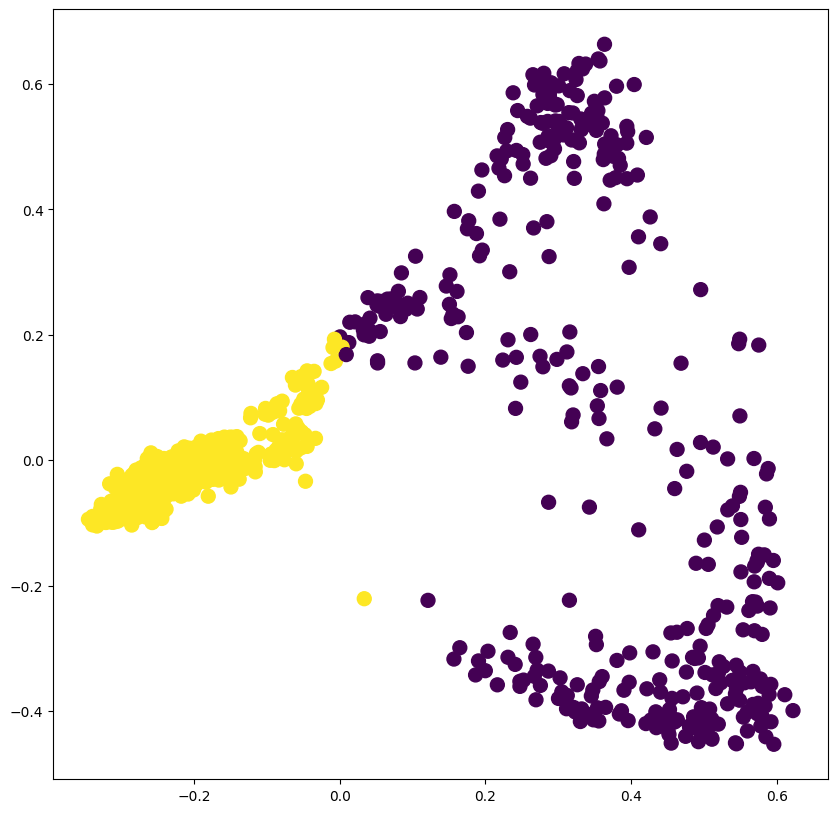

In [266]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [267]:
# Choisir une année
year = 1960

In [268]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "ser", "lot",]
sw = set(sw)


In [269]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

NameError: name 'WordCloud' is not defined